# Parameter sweep 

Take a range of data values and calculate statistics describing the predictive performance

In [7]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
input_dir = "/home/jovyan/work/taux/manuscript/data/test/test_output/2024-01-09"

plotd = []
stats = []
for effect in sorted([3.0, 2.0, 1.0, 0.75, 0.5, 0.25]):
    for ndiff in [50, 25, 15, 10, 5]:
        for corr in [0.25, 0.5, 0.75, 0.9]:
            for frac in [0.05, 0.10, 0.15, 0.2, 0.25]:
                
                try:
                    var_path = f"top-var-synthetic-validation-eff-{effect}-ndiff-{ndiff}-frac-{frac}-corr-{corr}-2024-01-09.tsv"
                    var_stats = pd.read_csv(os.path.join(input_dir, var_path), sep='\t', index_col=(1,2,3,4,5,6))
                    for method in ["ElasticNet", "Linear SVM", "RBF SVM"]:
                        var_auc = var_stats.loc[(method, "test", effect, ndiff, frac, corr), "AUC"]
                        plotd.append(
                            ("HVG", method, effect, 2 * ndiff, corr, frac, max(var_auc, 1.0 - var_auc))
                        )
                        
                except:
                    pass
                    
                try:
                    diff_path = f"top-diff-synthetic-validation-eff-{effect}-ndiff-{ndiff}-frac-{frac}-corr-{corr}-2024-01-09.tsv"
                    diff_stats = pd.read_csv(os.path.join(input_dir, diff_path), sep='\t', index_col=(1,2,3,4,5,6))
                    for method in ["ElasticNet", "Linear SVM", "RBF SVM"]:
                        diff_auc = diff_stats.loc[(method, "test", effect, ndiff, frac, corr), "AUC"]
                        plotd.append(
                            ("DEG", method, effect, 2 * ndiff, corr, frac, max(diff_auc, 1.0-diff_auc))
                        )
                except:
                    pass
                
                try:
                    ratio_path = f"top-ratio-synthetic-validation-eff-{effect}-ndiff-{ndiff}-frac-{frac}-corr-{corr}-2024-01-09.tsv"
                    ratio_stats = pd.read_csv(os.path.join(input_dir, ratio_path), sep='\t', index_col=(1,2,3,4,5, 6))
                    for method in ["ElasticNet", "Linear SVM", "RBF SVM"]:
                        ratio_auc = ratio_stats.loc[(method, "test", effect, ndiff, frac, corr), "AUC"]
                        plotd.append(
                            ("DEGR", method, effect, 2 * ndiff, corr, frac, max(ratio_auc, 1.0-ratio_auc))
                        )
                except:
                    pass

In [9]:
plotd = pd.DataFrame(plotd, columns=["Gene Filter", "ML Algorithm", "Effect Size", "# DEGs", "Correlation", "Subtype Fraction", "AUROC"])

In [10]:
plotd

,Gene Filter,ML Algorithm,Effect Size,# DEGs,Correlation,Subtype Fraction,AUROC
0,HVG,ElasticNet,0.25,100,0.25,0.05,0.657895
1,HVG,Linear SVM,0.25,100,0.25,0.05,0.636842
2,HVG,RBF SVM,0.25,100,0.25,0.05,0.500000
3,DEG,ElasticNet,0.25,100,0.25,0.05,0.522632
4,DEG,Linear SVM,0.25,100,0.25,0.05,0.572632
...,...,...,...,...,...,...,...
5395,DEG,Linear SVM,3.00,10,0.90,0.25,0.564000
5396,DEG,RBF SVM,3.00,10,0.90,0.25,0.550267
5397,DEGR,ElasticNet,3.00,10,0.90,0.25,0.989733
5398,DEGR,Linear SVM,3.00,10,0.90,0.25,0.995867


ElasticNet DEG 0.6302944795142472
ElasticNet DEGR 0.8142903750071666
ElasticNet HVG 0.583805344832158


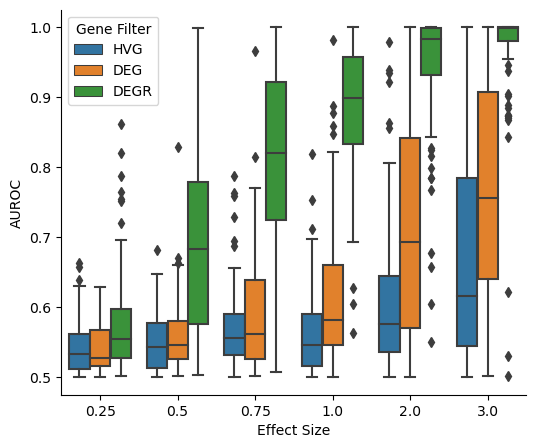

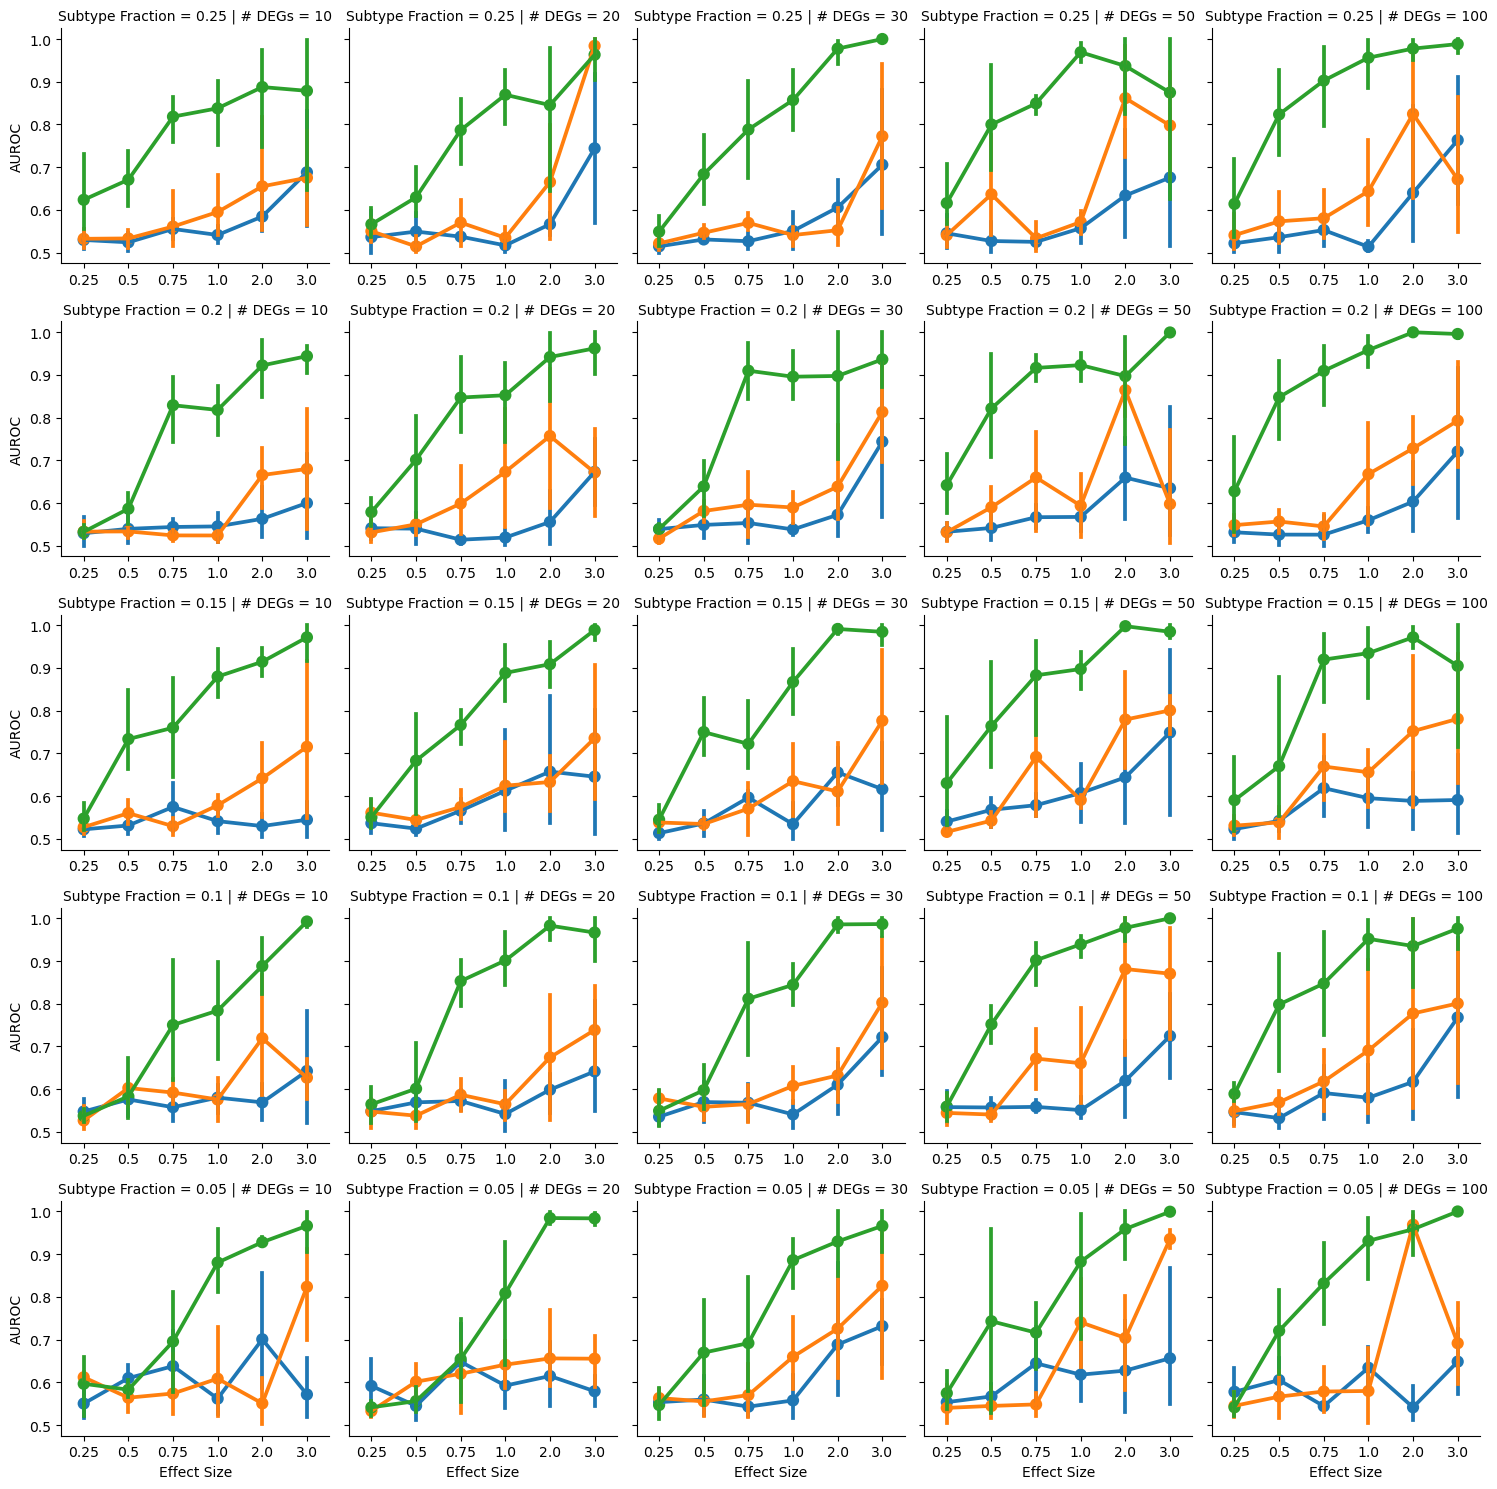

Linear SVM DEG 0.6050650342277262
Linear SVM DEGR 0.8309524458634331
Linear SVM HVG 0.5802434539330352


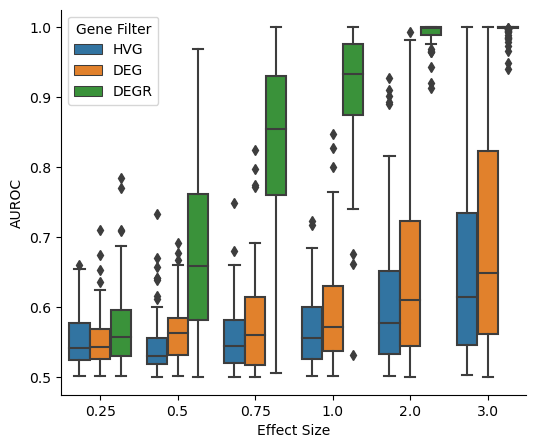

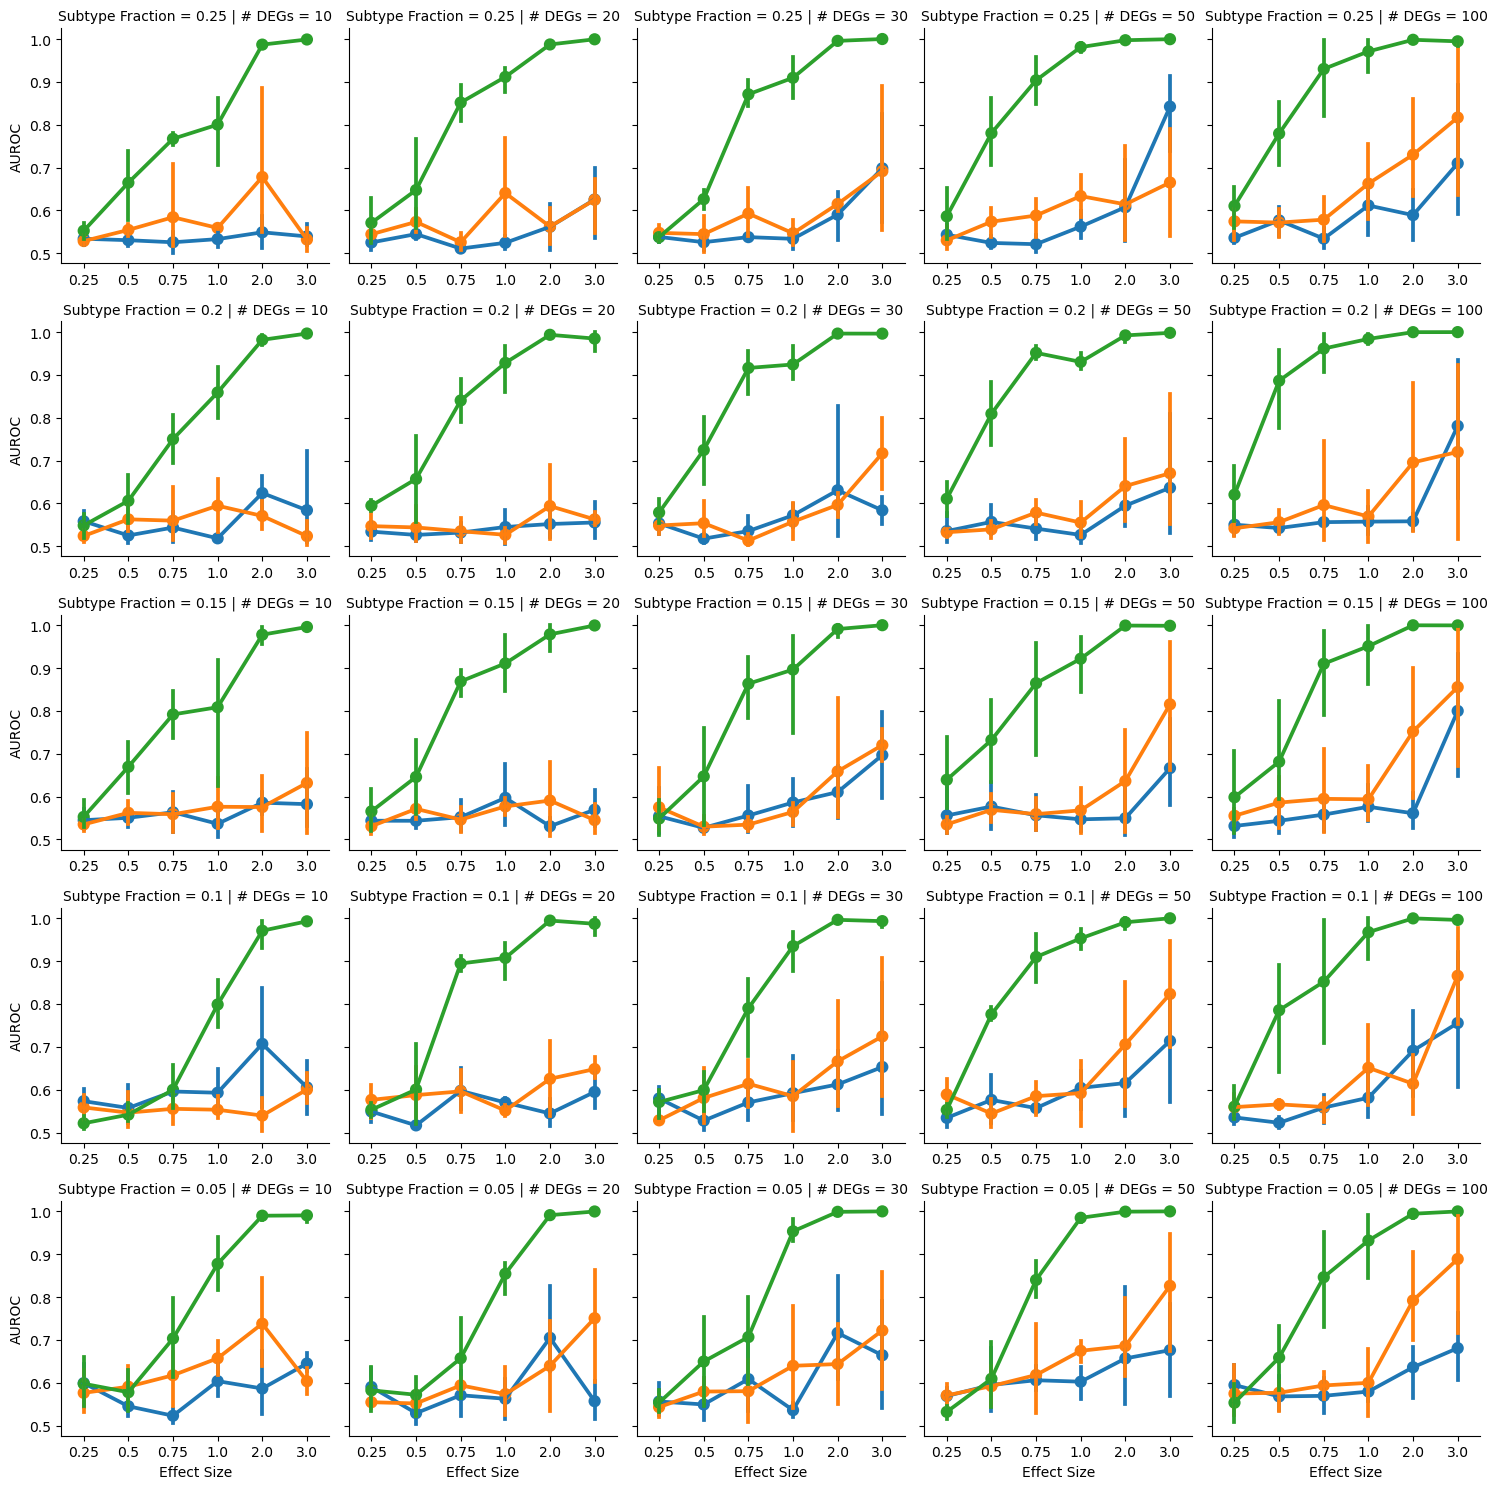

RBF SVM DEG 0.6139582325080982
RBF SVM DEGR 0.8293716963453875
RBF SVM HVG 0.5844936834329492


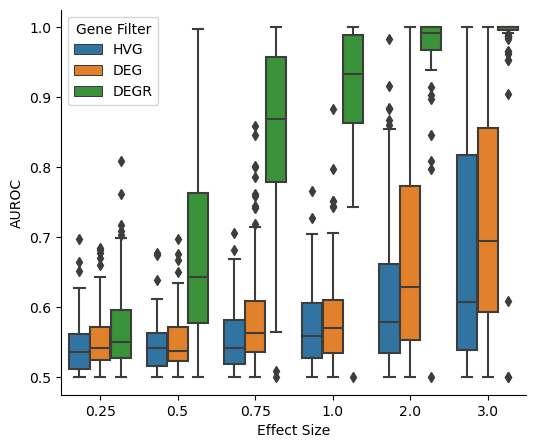

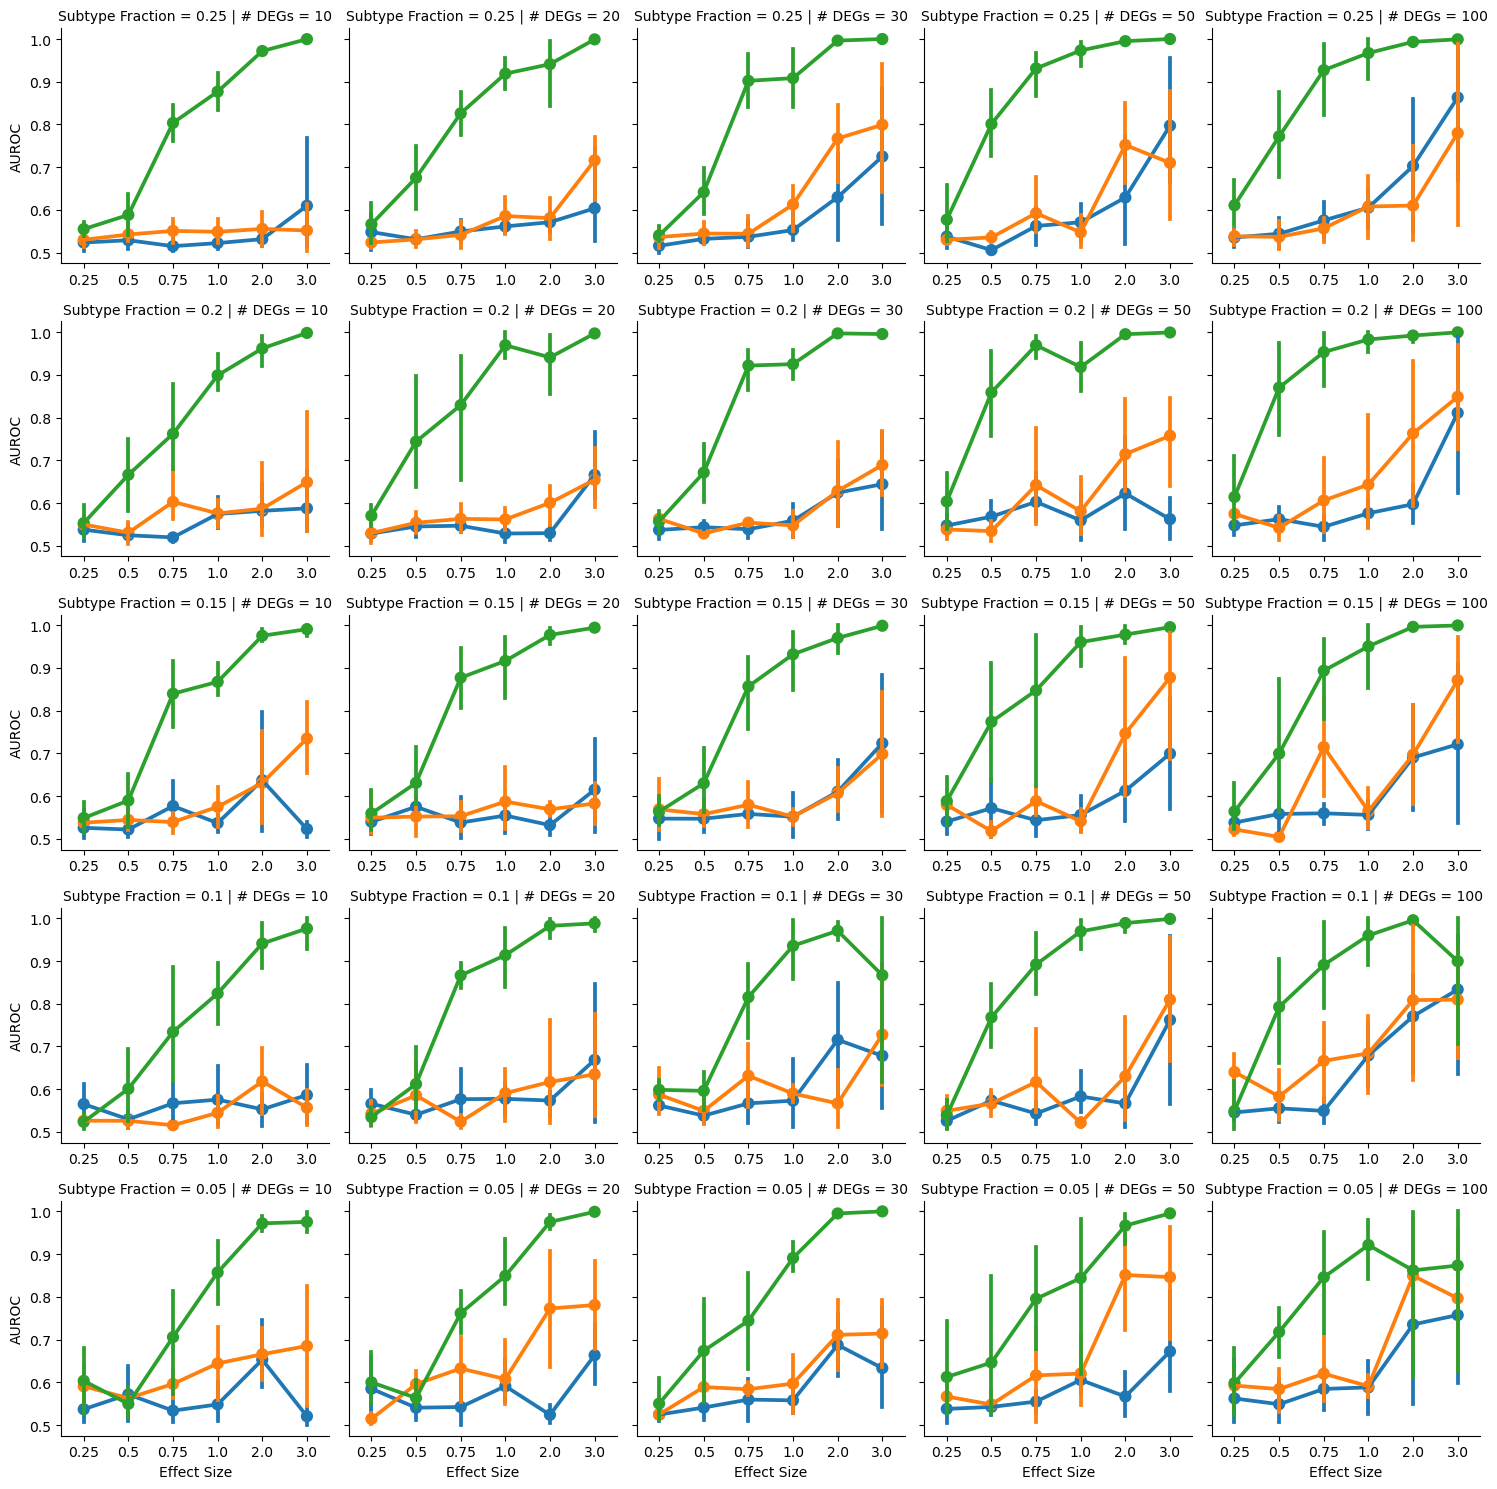

In [14]:
for model, rows in plotd.groupby("ML Algorithm"):
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    
    for gf, rs in rows.groupby("Gene Filter"):
        print(model, gf, np.mean(rs["AUROC"]))
    
    sns.boxplot(rows, x="Effect Size", y="AUROC", hue="Gene Filter", ax=ax)
    
    #ax.set_title(f"Area Under Reciever Operator Curves using {model}")
    ax.set_xlabel("Effect Size")
    ax.set_ylabel("AUROC")
    
    sns.despine()
    
    plt.savefig(f"../../../figures/synthetic/synthetic-{model}-prediction-auc-box-plot.svg", 
                format='svg', 
                bbox_inches='tight')
    plt.show()
    
    # Initialize a grid of plots with an Axes for each walk
    grid = sns.FacetGrid(rows, col="# DEGs", row="Subtype Fraction", hue="Gene Filter", sharex=False, row_order=[0.25, 0.2, 0.15, 0.1, 0.05])
    grid.map(sns.pointplot, "Effect Size", "AUROC", order=[0.25, 0.5, 0.75, 1.0, 2.0, 3.0])
    
    plt.savefig(f"../../../figures/synthetic/synthetic-{model}-prediction-auc-pointplot.svg", 
                format='svg', 
                bbox_inches='tight')
    
    plt.show()
